# Predicting Diabetes

## Import Libraries

In [1]:
import pandas as pd # pandas is a dataframe library
import matplotlib.pyplot as plt # plots data
import numpy as np # provides n-dimensional object support

# do plotting inline instead of in a seprate windows
# jupyter window magic function
%matplotlib inline 

## Load and review data

In [2]:
df = pd.read_csv('./data/pima-data.csv') # load pima data 

In [3]:
df.shape # gives the structure of the data: rows and cols

(768, 10)

In [4]:
df.head() # returns by default the top 5 data rows of the data frame

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [5]:
df.head(3) # returns just 3 rows

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True


In [6]:
df.tail(2) # returns the last two rows of the data frame 

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
766,1,126,60,0,0,30.1,0.349,47,0.0000,True
767,1,93,70,31,0,30.4,0.315,23,1.2214,False


### Definition of features in this data frame
From the metadata on the data source we have the following definition of the features.

| Feature       | Description                                    | Comments                    |
|---------------|------------------------------------------------|-----------------------------|
| num_preg      | number of pregnancies                          |                             |
| glucose_conc  | Plasma glucose concentration a 2 hours in an oral glucose tolerance test |   |       
| diastolic_bp  | Diastolic blood pressure (mm Hg)               |                             |
| thickness     | Triceps skin fold thickness (mm)               |                             |
| insulin       | 2-Hour serum insulin (mu U/ml)                 |                             |
| bmi           | Body mass index (weight in kg/ (height in m)^2 |                             |
| diab_pred     | Diabetes pedigree function                     |                             |
| age           | Age in years                                   |                             |
| skin          | ????                                           | What is this?               |
| diabetes      | Class variable (1=True, 0=False)               | Why is our data in boolean? |

### Columns to eliminate
In general we want to eliminate any columns we don't need:
* Columns with no values or are full of empty values
* Columns that are duplicates
* Columns that provide the same info in a different format (Correlated Columns)

## Check for null values in the data frame

In [7]:
df.isnull().values.any() # if any nulls are found any() returns true

False

## Check for correlated values

In [8]:
def plot_corr(df, size = 16):
    """
    Function plots a graphical correlation matrix for each pair of columns in the database.
        Input:
           df: pandas dataframe to check
           size: vertical and horizontal size of the plot
        Displays:
            matrix of correlation b/w cols.
            Blue-Cyan-Yellow-Red-DarkRed => less to more correlated
            Expect a darkred line running from top left to bottom right
    """
    
    corr = df.corr() # data frame correlation function.
    fig, ax = plt.subplots(figsize = (size, size))
    cax = ax.matshow(corr) # color code the rectange by correlation value
    # pass the no of columns and their names for labeling x & y cells 
    plt.xticks(range(len(corr.columns)), corr.columns) # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns) # draw y tick marks
    plt.title('Diabetes feature correlation')

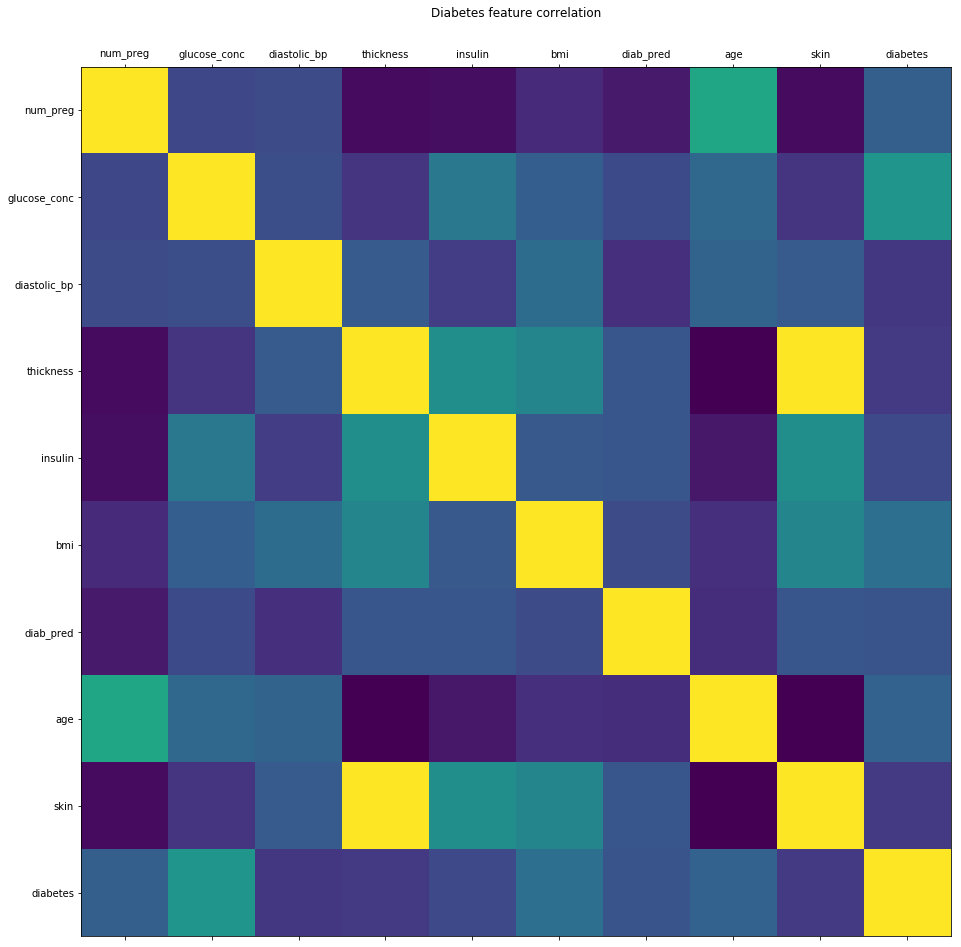

In [9]:
plot_corr(df)

*The above graph shows a strong correlation b/w skin & thickness*

**Lets see the correlation values**

In [10]:
df.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


*The correlation b/w each column with its self is 1 which is to be expected but notice the 1.0 correlation in the cells (skin row, thickness col) and (thickness row, skin col). This means that the values are changing in exact proportions to each other. Having two features that move together adds no additional info so we can drop one of these features*.

### Drop the skin col

In [11]:
del df['skin'] # removes the skin col from our data frame

In [12]:
# verify the col is dropped by checking the head again
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


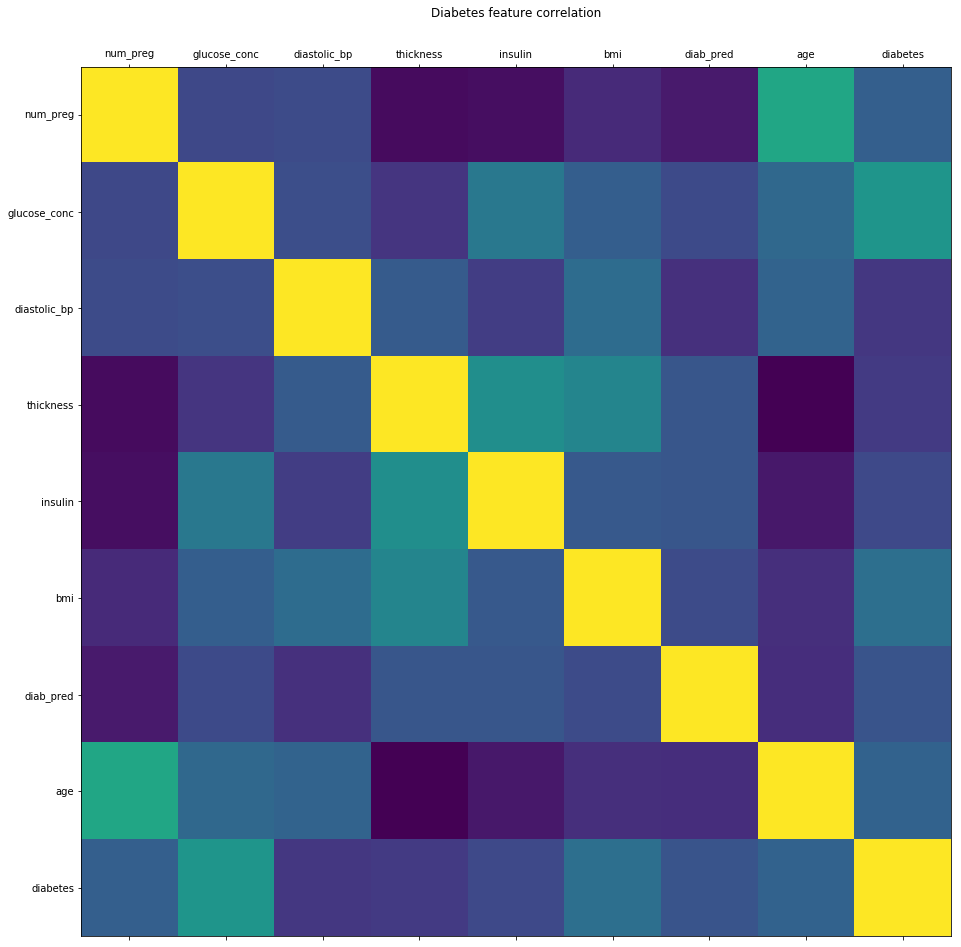

In [13]:
# lets now verify again that there are no correlated cols in the plot
plot_corr(df)

## Molding the data

* Adjusting data types
* Creating new cols, if required
* Fit the data for training

### Check data types


In [14]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


As we can see the diabetes feature is in boolean we need to change this to a numeric type to ensure
they work with all algorithms.

**Change True to 1, False to 0**


In [15]:
# define a mapping dictionary
diabetes_map = {True: 1, False: 0}
# Then we use the map method to change the values from True to 1 and False to 0.
df['diabetes'] = df['diabetes'].map(diabetes_map)
# lets check to see the results now
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Lets see the distribution of the data now

**Check True/False ratio in the data frame**

In [16]:
num_true = len(df.loc[df['diabetes'] == 1])
num_false = len(df.loc[df['diabetes'] == 0])
percentage_true = (num_true / (num_true + num_false)) * 100
percentage_false = (num_false / (num_true + num_false)) * 100
print('Number of true cases: {0} ({1:2.2f}%)'.format(num_true, percentage_true))
print('Number of false cases: {0} ({1:2.2f}%)'.format(num_false, percentage_false))

Number of true cases: 268 (34.90%)
Number of false cases: 500 (65.10%)


*Since the ratios come out to be reasonable  we can train our prediction model using this data.
If the vast majority of the data was either True/False the standard learning algorithms might not apply*  

## Algorithm Selection for training 

There are over 50 algorithms available for training the data. We decide on the algorithm based on some factors

### Alogrithm Decision Factors

* Learning Type algorithm supports
* Result of the algorithm
* Complexity of the algorithm
* Basic or Enhanced

### Analyzing the problem and solution statements for deciding the choice of training algorithm. 

**We will use solution statement and knowledge of the machine learning workflow to guide in the evaluation of these factors.**

Lets look at the solution statement first

*"Use the machine learning workflow to process and transform the Pima Indian data to create a prediction model. This model must predict which people are likely to develop diabetes with 70% or greater accuracy."*

From this we infer that the solution is about prediction which means *supervised machine learning*.

Therefore our alogrithm must support **supervised learning type**.

Prediction results can be divided into two categories:
   * Regression - continous set of values 
   * Classification - discrete set of values which are small, medium or large.
   
Since we must predict diabetes which is only True/False hence **Diabetes is a discrete binary outcome**.

Thus our algorithm must support **classifcation** in general and **binary classification** in particular.

Many algorithms support both regression and classification so to further narrow down the choices choose **simple and basic**.

Thus the **complexity** for the algorithm must be be **less** and it should be **basic**.
    

### Candidate Algorithms

Now we will analyze three basic classification algorithms as possibilites for use in our initial training and evaluation.

The algorithms are:
* Naive Bayes
* Logistic Regression
* Decision Tree

**Naive Bayes**
* Based on Bayes theorem.
* Simple - easy to understand.
* Fast - upto 100x faster training time.
* Stable to data changes. 
* Based on likelihood and probability.
* Makes some naive assumptions about the data:
    * All features have the same weight.
    * All features are independent of each other.
    * All features equally impact the result.
* Requires small amount of data to train.

**Logistic Regression**
* Returns a binary value despite the regression name.
* Measures relationship of each feature. 
* Relationship between features are weighted based on their impact on training results.
* The resultant value is mapped against a curve with two values 1 & 0.

**Decision Tree**
* Uses a binary tree structure.
* Each node makes a decision based upon the values of a feature.
* At each node the feature value causes us to go down one path or another.
* Requires enough data to determine nodes and splits.
* Easy to understand and visualize. 


## Initial Training of the Model
 
**Machine Learning Training**

Letting specific data teach a Machine Learning algorithm to create a specific prediction model.

* If data changes or new data becomes available we need to retrain the model.
* Retraining ensures the model can make use of the new data to make better predictions.
* We can also verify the training performance with the new data.

**Training Overview**
* *Split data* - The prepared data is split into two data sets:
    * Training (70% data) - One for training the model
    * Testing (30% data) - Other for testing the model's accuracy.
* *Train model* - Train the algorithm with the training data.
    * The training process produces the trained model
    * It is based on the logic of the alogrithm and the values of the features in the training data.
    * The training exposes the code in the algorithm to data with which it interacts.
    * The model creates a decision boundary for classification. 
    * The structure of this boundary is defined by combination of algorithm and training data.
    * Perfect accuracy against the training data is not the goal.
    * The goal is accuracy against real world data.
* *Evaluate model* - Use previously unseen test data for evaluation
    * The test data acts as real world training data.
    * This gives us the perforance expected of the model with real world data.

**Selecting Training features**
* We want to train with minimum features(columns) to make the training faster and accurate.
* To select relevant features we reason about the context of the problem.
* After selection we use the rest of the features for training.

## Use of scikit-learn library

scikit-learn is a popular library for handling machine learing training and evaluation tasks. 

Designed to work with NumPy, SciPy, matplotlib and Pandas libraries to make it easy to perform training and evaluation tasks

The tools provided by the library are:
* Data splitting
* Pre-processing
* Feature selection
* Model training
* Model tuning
* Common interface for accessing ML algorithms

## Splitting the data

70% for training, 30% for testing 

In [17]:
# scikit-learn contains train_test_split method which makes it easy to split the data 


from sklearn.model_selection import train_test_split # import training test split method from sklearn

# next we define the feature cols and predicted col
feature_col_names = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi', 'diab_pred', 'age']
predicted_class_names = ['diabetes']

# split our data into two data frames one containing the features cols and other with the diabetes result
X = df[feature_col_names].values # predictor feature cols (8)
Y = df[predicted_class_names].values # predicated class (1=True, 0=False) col (1)

split_test_size = 0.30 # define the train_test split ratio 30%

# These data frames and the split size are passed to the function which then return four numpy arrays of data
# the arrays contain the values of test and training feature cols and the test and train diabetes results
# Since the splitting process must be random we pass the random_state any value
# random_state sets the seed for the random no generator used as part of the splitting process
# setting the seed to a constant ensures that if the function is run again the split will be identical
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = split_test_size, random_state = 42)

We check to ensure we have the desired 70% train and 30% test split of the data

In [18]:
#  here df.index is the whole data frame
print('{0:0.2f}% in training set'.format((len(X_train) / len(df.index)) * 100))
print('{0:0.2f}% in test set'.format((len(X_test) / len(df.index)) * 100))

69.92% in training set
30.08% in test set


We also verify the predicted value (True/False) was split the same b/w the train & test data sets

In [19]:
total_length = len(df.index) # no of observarions (rows) in the whole data frame
original_true = len(df.loc[df['diabetes'] == 1]) # no of observations with diabetes 
original_true_perct = (original_true / total_length) * 100 # ratio of true to whole in the full set
original_false = len(df.loc[df['diabetes'] == 0]) # no of observations without diabetes 
original_false_perct = (original_false / total_length) * 100 # ratio of false to whole in the full set
# printing the result
print('Original set True : {0} ({1: 0.2f}%)'.format(original_true, original_true_perct)) 
print('Original set False : {0} ({1: 0.2f}%)'.format(original_false, original_false_perct))

training_true = len(Y_train[Y_train[:] == 1]) # no of observations with diabetes in the train set
training_true_perct = (training_true / len(Y_train)) * 100 # ratio of true to whole in train set
training_false = len(Y_train[Y_train[:] == 0]) # no of observations without diabetes in the train set
training_false_perct = (training_false / len(Y_train)) * 100 # ratio of false to whole in train set
# printing the result
print('Train set True : {0} ({1: 0.2f}%)'.format(training_true, training_true_perct))
print('Train set False : {0} ({1: 0.2f}%)'.format(training_false, training_false_perct))

testing_true = len(Y_test[Y_test[:] == 1]) # no of observations with diabetes in the test set
testing_true_perct = (testing_true / len(Y_test)) * 100 # ratio of true to whole in test set
testing_false = len(Y_test[Y_test[:] == 0]) # no of observations without diabetes in the test set
testing_false_perct = (testing_false / len(Y_test)) * 100 # ratio of false to whole in test set
# printing the result
print('Test set True : {0} ({1: 0.2f}%)'.format(testing_true, testing_true_perct))
print('Test set False : {0} ({1: 0.2f}%)'.format(testing_false, testing_false_perct))


Original set True : 268 ( 34.90%)
Original set False : 500 ( 65.10%)
Train set True : 188 ( 35.01%)
Train set False : 349 ( 64.99%)
Test set True : 80 ( 34.63%)
Test set False : 151 ( 65.37%)


Since the percentages were preserved while splitting the data therefor we can move forward with these sets.

### Post-split Data Preparation

#### Hidden Missing Values

In [20]:
# Sometimes null values can be hiding in plain sight.
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


*Notice the thickness in the index 2 row*

Having a physical thickness is not possible and hence this is a hidden missing value.

How many other rows have unexpected 0 values??

Are zeros values valid for such features??

Lets find out


In [21]:
def printZeroValues(df):
    print('rows in dataframe: {}'.format(len(df)))
    print('rows missing glucose_conc: {}'.format(len(df.loc[df['glucose_conc'] == 0])))
    print('rows missing diastolic_bp: {}'.format(len(df.loc[df['diastolic_bp'] == 0])))
    print('rows missing thickness: {}'.format(len(df.loc[df['thickness'] == 0])))
    print('rows missing insulin: {}'.format(len(df.loc[df['insulin'] == 0])))
    print('rows missing bmi: {}'.format(len(df.loc[df['bmi'] == 0])))
    print('rows missing diab_pred: {}'.format(len(df.loc[df['diab_pred'] == 0])))
    print('rows missing age: {}'.format(len(df.loc[df['age'] == 0])))

printZeroValues(df)


rows in dataframe: 768
rows missing glucose_conc: 5
rows missing diastolic_bp: 35
rows missing thickness: 227
rows missing insulin: 374
rows missing bmi: 11
rows missing diab_pred: 0
rows missing age: 0


*As we can see there are lot of rows with 0 values for some features which may indicate missing data*

**Which rows are really an issue and which rows could validly have zeros for their features??**

To answer this we need to see the possible range of values for these features.

After searching for these features it is revealed that out of these features only insulin can have a 0 value which also is likely to be incorrect.

**So now the question is what to do with this hidden missing data??**

### Missing data

Missing data is a common problem and there are a few options to deal with them:
* Ignore them
* Delete the rows with missing values (Drop those observations)
* Replace missing values with another value (Impute)

Since we have 768 rows, and almost 50% of the rows have missing values we can't just ignore/delete them.

Therefore we need to look at replacing those values with something else, this is called **Imputing**.

**Imputing**
* Common practice for handling missing data.
* With imputing we have a couple of options:
    * Replace the missing fields (or zero fieds) with mean, median or other statistic for the col.
    * Replace the value with a new value derived from the remaining features in the row as determined by an expert.

We will use the mean of the col since we don't have an expert available (mean imputing).
    

### Impute with the mean

In [22]:
# scikit contains an impute class which makes it very easy to impute data
# import the Imputer class
from sklearn.preprocessing import Imputer

# Impute with mean all 0 readings for all values on the axis 0 which is col
fill_0 = Imputer(missing_values = 0, strategy = 'mean', axis = 0)

# use fit_transform function to create a new numpy array with any feature value of 0 replaced by the mean for the col
# do this for both train and test feature values
X_train = fill_0.fit_transform(X_train)
X_test = fill_0.fit_transform(X_test)


## Training initial algorithm - Naive Bayes

In [23]:
# import Naive Bayes algorithm from the library
# In case of naive_bayes there are multiple implementations 
# we are using the gaussian algo that assumes that the feature data is distributed in a gaussian 
from sklearn.naive_bayes import GaussianNB

# create Gaussian Naive Bayes model object and train it with data
nb_model = GaussianNB() # our model object

# call the fit method to create a model trained with the training data 
# numpy.ravel returns a contiguous flattened array
nb_model.fit(X_train, Y_train.ravel())

GaussianNB(priors=None)

Thats it the models trained. Now we can evaluate our model using the training data.

## Performance on Training data

In [24]:
# pass feature data to the models predict function
# the predict function will return 1's and 0's representing True and False
# lets first predict against the training data 
# X_train is the data we used to train the model
nb_predict_train = nb_model.predict(X_train)

# to see the accuracy we load the scikit metrics library
# metrics has methods that let us get the statistics on the models predictive performance
from sklearn import metrics
# Accuracy
# accuracy_score takes two parameters: the actual output data and the predicted output
train_accuracy = metrics.accuracy_score(Y_train, nb_predict_train) # will be b/w 0 & 1
print('Accuracy(%) on training data itself: {0: .4f}'.format(train_accuracy * 100))


Accuracy(%) on training data itself:  75.4190


## Performance on Testing data

In [25]:
# Now lets predict against the testing data
# X_test is the data we kept aside for testing
nb_predict_test = nb_model.predict(X_test)
# Y_test is the actual output and nb_predict_test is the predicted one 
test_accuracy = metrics.accuracy_score(Y_test, nb_predict_test)
print('Accuracy(%) on test data: {0: .4f}'.format(test_accuracy * 100))

Accuracy(%) on test data:  73.5931


Looks good but let's dive deeper into the metrics to see how this accuracy was derived and to see if our original goal of 70% prediction rate for diabetes was reached.

#### Metrics

In [26]:
# Confusion matrix provides the True Positive, False Positive, False Negative & True Negative.
print('Confusion Matrix')
# the labels are for 1 = True to upper left and 0 = False to lower right
print(metrics.confusion_matrix(Y_test, nb_predict_test, labels=[1, 0]))
print('')


Confusion Matrix
[[ 52  28]
 [ 33 118]]



From the confusion matrix we find:
TP = 52, FP = 33, FN = 28 and TN = 118

A perfect classifier would have the following values:
TP = 80, FP = 0, FN = 0 and TN = 151

* True Positive (TP) - Actual diabetes and predicted to be diabetes.
* False Negative (FN) - Actual diabetes but were predicted to be not diabetes.
* False Positive (FP) - Actual not diabetes but were predicted to be diabetes
* True Negative (TN) - Actual not diabetes and predicted to be not diabetes

**Does this model predict with 70% or greater accuracy which people are likely to develop diabetes???**

To see that we need the classification report.

In [27]:
# the classification report generates statistics based on the values shown in the confusion matrix.
print('Classification report')
print(metrics.classification_report(Y_test, nb_predict_test, labels = [1, 0]))

Classification report
             precision    recall  f1-score   support

          1       0.61      0.65      0.63        80
          0       0.81      0.78      0.79       151

avg / total       0.74      0.74      0.74       231



Based on our problem statement we want to focus on the probability of a True (1) result meaning the patient has the disease.

The **recall** is also known as True Positive rate and sensitivity, it is how well the model is predicting diabetes when the patient does have diabetes.

Recall = TP / (TP + FN) = 52 / (52 + 28) = 52 / 80 = 0.65 or **65%** 

The **precision** is also known as the positive predictor value, this is how often patient actually had diabetes when the model predicted they would.

Precision = TP / (TP + FP) = 52 / (52 + 33) = 52 / 85 = 0.61 or **61%**


**Model Performance**: Both recall and precision for True (1) are less than our expected goal of 70% or more.

## Performance Improvement Options

We have several options for improving performance
* Adjust the current algorithm - tune hyper parameters
* Get more data or improve data
* Improve training 
* Switch algorithms 

Since the Naive Bayes model doesn't have any parameters we can't tune the algorithm.

The data is also limited so we focus on changing the algorithm first and then improve the training.

## New Training Algorithm - Random Forest

Random Forest is a powerful algorithm with following features:
* Ensemble Algorithm
* Based on Decision Trees
* Fits multiple tress with random subsets of training data
* Averages tree results to improve performance and control overfitting.

In [28]:
# import random forest from scikit
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state = 54) # Create random forest object
rf_model.fit(X_train, Y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=54, verbose=0, warm_start=False)

### Prediction using Random Forest

#### Predict Training Data

In [29]:
rf_predict_train = rf_model.predict(X_train)
# training metrics
print('Accuracy: {0:.4f}'.format(metrics.accuracy_score(Y_train, rf_predict_train)))

Accuracy: 0.9832


#### Predict Test Data

In [30]:
rf_predict_test = rf_model.predict(X_test)
# training metrics
print('Accuracy: {0:.4f}'.format(metrics.accuracy_score(Y_test, rf_predict_test)))

Accuracy: 0.7359


#### Perfomance metrics on Test Data

In [31]:
print(metrics.confusion_matrix(Y_test, rf_predict_test, labels=[1, 0]))
print('')
print('Classification report')
print(metrics.classification_report(Y_test, rf_predict_test, labels=[1, 0]))

[[ 47  33]
 [ 28 123]]

Classification report
             precision    recall  f1-score   support

          1       0.63      0.59      0.61        80
          0       0.79      0.81      0.80       151

avg / total       0.73      0.74      0.73       231



*As can be seen despite perfect accuracy of the algorithm in training data, it fails to achieve 70% target falling well short.
This is a classic case of overfitting, the model shows big difference in training and test data.
The algorithm is overfitting the training data i.e., model has learned the training data too well.* 

**Model Performance**: Both recall and precision for True (1) are less than our expected goal of 70% or more.

### Overfitting

* Train with training data.
* Complex decision boundary.
* Good fit of training data.
* Poor fit of test data.

### Fixing Overfitting

#### Changing Regularization hyperparameter

* Change hyperparameters of the algorithm to define how the algorithm learns and operates.
* hyperparameter that impacts overfitting - Regularization hyperparameter.
* Setting the value of the Regulariztion hyperparameter allows the developer to control how much the algorithm focuses on precisely fitting every corner case of the training data, the regularization term dampens the values produced by the trained model, this dampning decreases the accuracy of the model on training data but potentially increases the accuracy of the trained model on new data.
* Many algorithms have regularization parameter.
* Some experimentation is required to get the best values for hyperparameters with the specific data

#### Cross validation 

* Use multiple subsets of the training data during the training process

*Come up with a compromise b/w accuracy with training data and accuracy with testing and real world data.
This is called **Bias-variance trade-off***.
Sacrifice some perfection in training for better overall performance with test and real world data.

### Performance Improvement Options

* Adjust the current random forest algorithm.
* Get more data or imporve data to prevent overfitting.
* Improve training using cross validation.
* Switch Alogrithms.

*Since the default hyperparameters for overfitting are set already and we have no extra data plus cross validation isn't too much of a help for random forest so we switch algorithm to Logistic Regression.*

### Logistic Regression

* Simple and works quite well in many classification algorithms.

In [32]:
# import the algo from sci-kit learn linear model module
from sklearn.linear_model import LogisticRegression

In [33]:
# set up the model
# C - regulatization hyperparameter 
lr_model = LogisticRegression(C=0.7, random_state=54) # set c to 0.7 initially

In [34]:
# train the algo
lr_model.fit(X_train, Y_train.ravel())

LogisticRegression(C=0.7, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=54, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#### Prediction on Training Data 

In [35]:
# evaluate against the training data
lr_predict_train = lr_model.predict(X_train)
# training metrics
print('Logistic Regression -> Accuracy on training data: {0:.4f}'.format(metrics.accuracy_score(Y_train, lr_predict_train)))

Logistic Regression -> Accuracy on training data: 0.7728


#### Prediction on Test Data

In [36]:
lr_predict_test = lr_model.predict(X_test)
# training metrics
print('Logistic Regression -> Accuracy on test data: Accuracy: {0:.4f}'.format(metrics.accuracy_score(Y_test, lr_predict_test)))

Logistic Regression -> Accuracy on test data: Accuracy: 0.7446


#### Performance metrics on Test Data

In [37]:
print(metrics.confusion_matrix(Y_test, lr_predict_test, labels=[1, 0]))
print('')
print('Classification report')
print(metrics.classification_report(Y_test, lr_predict_test, labels=[1, 0]))

[[ 44  36]
 [ 23 128]]

Classification report
             precision    recall  f1-score   support

          1       0.66      0.55      0.60        80
          0       0.78      0.85      0.81       151

avg / total       0.74      0.74      0.74       231



**Model Performance**: Both recall and precision for True (1) are less than our expected goal of 70% or more.

*The scores look promising but we are still not getting the above 70% recall score we want, so lets tune the regularization parameter.*

#### Setting the regularization parameter

A loop selects the regularization parameter which returns the highest recall

In [38]:
# try C values from 0 to 4.9 in increments of 0.1
# for each C value a logistic regression object is created
# then trained with the training data and then used to predict the test results
# Each test recall score is computed and the highest recall score is recorded,
# the score is used to get the C value that produced the highest recall score. 
# see which C value results in the best recall score
C_start = 0.1
C_end = 5
C_inc = 0.1
C_values, recall_scores = [], [] # used to hold the C_values and their corresponding recall_scores

C_val = C_start
best_recall_score = 0
# this while loop will try C values from 0.1 to 4.9
while C_val < C_end:
    # add this C_val to the array
    C_values.append(C_val)
    
    # create LR object using current C value
    lr_model_loop = LogisticRegression(C=C_val, random_state = 35)
    # Train the algo 
    lr_model_loop.fit(X_train, Y_train.ravel())
    # Predict using test data
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    # Get the recall score
    recall_score = metrics.recall_score(Y_test, lr_predict_loop_test)
    
    # add the recall_score to the array
    recall_scores.append(recall_score)
    
    # if current recall_score is greater than the best so far then update the best scores
    if recall_score > best_recall_score:
        best_recall_score = recall_score # update the best_recall_score
        best_lr_predict_test = lr_predict_loop_test # also the predictions for best score
    
    # increment the C_val
    C_val += C_inc 

# get the best C_val from the array
best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print('recall max value of {0:.3f} occured at C={1:.3f}'.format(best_recall_score, best_score_C_val))
  

recall max value of 0.613 occured at C=1.400


Text(0.5,1,'Regularization parameter C vs Recall Score for unbalanced class weight\n')

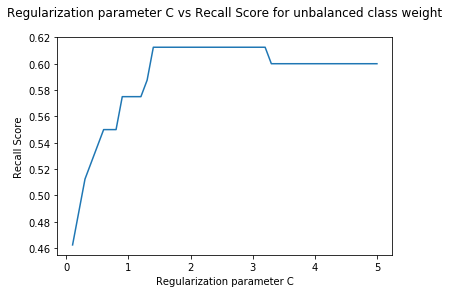

In [39]:
# we also plot the recall scores vs regularization value
# so as to get an idea of how recall changes with different regularization values  
plt.plot(C_values, recall_scores, '-')
plt.xlabel('Regularization parameter C')
plt.ylabel('Recall Score')
plt.title('Regularization parameter C vs Recall Score for unbalanced class weight\n')

*We are still not getting recall score of above 70%, what else can be tried.*

**Remember our data had more non-diabetes results than diabetes results, perhaps this imbalance is causing an issue.** 

### Unbalanced Classes

* Very common in data sets
* They occur when one class result (diabetes vs not-diabetes in our data) occur more than the other.
* The data in this case - 65% No Diabetes, 35% Diabetes
* This imbalance in the classes can decrease the performance of an algorithm
* Can be causing biases estimation yielding poor prediction results.

### Fixing Unbalanced Classes

*Some algorithm implementations including Logistics Regression in sci-kit learn include a hyperparameter that instructs the algorithm to compensate for the class imbalance. This results in a shift in the predicted class boundary.* 

#### Logistic Regression with class_weight='balanced'

Lets enable this hyperparameter in LR model

See if it fixes the class imbalance and more importantly improves our models predictive capabilites.

In [40]:
# everythings remains the same except for the class_weight hyperparameter set in the LR object.

C_start = 0.1
C_end = 5
C_inc = 0.1
C_values, recall_scores = [], [] # used to hold the C_values and their corresponding recall_scores

C_val = C_start
best_recall_score = 0
# this while loop will try C values from 0.1 to 4.9
while C_val < C_end:
    # add this C_val to the array
    C_values.append(C_val)
    
    # create LR object using current C value and hyperparamter class_weight set to balanced
    lr_model_loop = LogisticRegression(C=C_val, class_weight='balanced', random_state = 35)
    # Train the algo 
    lr_model_loop.fit(X_train, Y_train.ravel())
    # Predict using test data
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    # Get the recall score
    recall_score = metrics.recall_score(Y_test, lr_predict_loop_test)
    
    # add the recall_score to the array
    recall_scores.append(recall_score)
    
    # if current recall_score is greater than the best so far then update the best scores
    if recall_score > best_recall_score:
        best_recall_score = recall_score # update the best_recall_score
        best_lr_predict_test = lr_predict_loop_test # also the predictions for best score
    
    # increment the C_val
    C_val += C_inc 

# get the best C_val from the array
best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print('recall max value of {0:.3f} occured at C={1:.3f} with balanced classes'.format(best_recall_score, best_score_C_val))

recall max value of 0.738 occured at C=0.300 with balanced classes


Text(0.5,1,'Regularization parameter C vs Recall Score for balanced class weight\n')

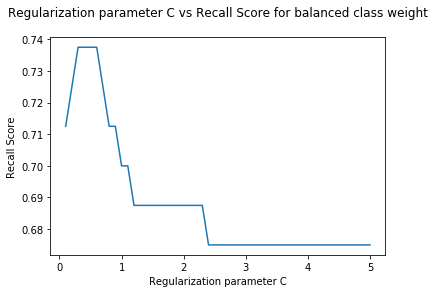

In [41]:
# we also plot the recall scores vs regularization value
# so as to get an idea of how recall changes with different regularization values  
plt.plot(C_values, recall_scores, '-')
plt.xlabel('Regularization parameter C')
plt.ylabel('Recall Score')
plt.title('Regularization parameter C vs Recall Score for balanced class weight\n')

*Finally we get a recall score of above 70%.*

In [47]:
# now we can train our model with the best hyperparameter C_value  and class_weigh balanced
best_lr_model = LogisticRegression(class_weight='balanced', C=best_score_C_val, random_state=35)
best_lr_model.fit(X_train, Y_train.ravel())
best_lr_predict_train = best_lr_model.predict(X_train)
best_lr_predict_test = best_lr_model.predict(X_test)
# and calculate the performance metrics
# training metrics on training data
print('LR model with best C value & balanced weights -> Accuracy on training data: {0:.4f}'.format(metrics.accuracy_score(Y_train, best_lr_predict_train)))
print('')
# training metrics on test data
print('LR model with best C value & balanced weights -> Accuracy on test data: {0:.4f}'.format(metrics.accuracy_score(Y_test, best_lr_predict_test)))
print('')
# performance metrics on test data
print('The confusion matrix for LR model with best C value and balanced weights is: ')
print(metrics.confusion_matrix(Y_test, best_lr_predict_test, labels=[1, 0]))
print('')
print('Classification report for LR model with best C value and balanced weights: ')
print(metrics.classification_report(Y_test, best_lr_predict_test, labels=[1, 0]))

LR model with best C value & balanced weights -> Accuracy on training data: 0.7449

LR model with best C value & balanced weights -> Accuracy on test data: 0.7143

The confusion matrix for LR model with best C value and balanced weights is: 
[[ 59  21]
 [ 45 106]]

Classification report for LR model with best C value and balanced weights: 
             precision    recall  f1-score   support

          1       0.57      0.74      0.64        80
          0       0.83      0.70      0.76       151

avg / total       0.74      0.71      0.72       231



**Model Performance**: recall for True (1) is greater than our expected goal of 70% or more.

*Goal achieved of 70% or greater accuracy in predicting diabetes*

### Few issues 

* The recall score of 70% is achieved with just one set of test data
* By looping through the values for setting regularization parameter we indirectly set the regularization parameter based upon the test data.

#### Issues with Train - Test Split
* Divide the data into training and test dataset.
* As we imporve the model we make adjustments to the model and retest on the test data.
* This way we are influenced by results with test data and indirectly tune the model to fit the test data.
* Thus our models performance on test data may not match the performance in real world data.

### Key Questions
*Is there some way we can test on more data and ensure we have the algorithm tuned to perform well on a wide set of data ?*

*How can we evaluate training without using test data ?*

We need some data to tune hyper parameters, and leave the test data aside for final testing only. 

Yes, we trade some performance in the test set for better performance on wider set of data 

### Few Solutions

#### Train - Validation - Test Split
* Divide the data into three datasets: Train - Validation - Test
* We use the validation set to tune and validate our model and only use the testing data for a final test.
* Very common technique.
* How to choose the validation set?
* Split 50% Training - 25% Validation - 25% Testing.
* If data isn't enough, this can be difficult.
* Also overtraining isn't addressed by this solution.

#### K-fold Cross Validation
* Doesn't use Testing data for evaluation
* Splits the training data into ten folds each of the same size.
* Then select one fold as the validation set, and make the other folds the training set.
* Train the algorithm and evaluate with the fold which is the validation set
* Repeat the training and evaluation with th other folds as the validation set until each of the folds has been used as the validation data.
* The result of each loop through one fold is a set of values parameters and the associated accuracy + perfomance metrics.
* This k-fold structure provides capability to generate multiple values with which to tune the hyper parameter.

**Tuning Hyperparameters with Cross validation**

For each fold

    Determine the best hyperparameter value
Next
    
    Set hyperparameter value to average best

This provides the model with a hyper parameter that may not perform the best on a specific fold or other subset of data but in general perfors well in all data.


In [48]:
## scikit-learn cross validation library to access cross validation methods
## that make it easy to perform k-fold cross validation 

# scikit-learn provides special ensemble versions of the algorithms that contain the code
# to determine the optimal hyperparamter value and set the model to that value

# AlgorithmCV built in Variants
    ## Can be used just like normal algorithms
    ## Take little longer to run 
    ## They begin with the base class name and end with CV
    ## Expose fit(), predict(),...
    ## Use the parameters in the constructor to specify things such as no of folds 
    ## The algorithm in then run k times
    ## When fit is then run k-fold validation is run with k folds on the training data
    ## the other parameters in the constructor let you define how the optimal value for hyperparameters is determined (mean, median)
    ## Algorithm + Cross Validation = AlgorithmCV

### Logistic Regression With Cross Validation

In [125]:
# scikit learn has an ensemble algorithm that combines logistic regression with cross validation called LogisticRegressionCV
from sklearn.linear_model import LogisticRegressionCV

# n_jobs -> use all the cores resources on the system
# cv -> no of folds
# Cs -> smaller values specify stronger regularization
# solver -> algorithm to use in the optimization problem (default - 'lbfgs')
lr_cv_model = LogisticRegressionCV(n_jobs=-1, Cs=3, refit=True, max_iter=100, solver='liblinear', cv=10, class_weight='balanced')
lr_cv_model.fit(X_train, Y_train.ravel())

LogisticRegressionCV(Cs=3, class_weight='balanced', cv=10, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=-1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='liblinear', tol=0.0001,
           verbose=0)

### Predict on train data

In [126]:
lr_cv_predict_train = lr_cv_model.predict(X_train)

# training metrics
print('Accuracy on training data: {0:.4f}'.format(metrics.accuracy_score(Y_train, lr_cv_predict_train)))
print("")
print('The confusion matrix for LR CV model with cross validation and balanced weights on training data is: ')
print(metrics.confusion_matrix(Y_train, lr_cv_predict_train, labels=[1, 0]))
print('')
print('Classification report for LR CV model with cross validation and balanced weights on training data is: ')
print(metrics.classification_report(Y_train, lr_cv_predict_train, labels=[1, 0]))
print(' 1 -> Diabetic\n 0 -> Not Diabetic')

Accuracy on training data: 0.7765

The confusion matrix for LR CV model with cross validation and balanced weights on training data is: 
[[144  44]
 [ 76 273]]

Classification report for LR CV model with cross validation and balanced weights on training data is: 
             precision    recall  f1-score   support

          1       0.65      0.77      0.71       188
          0       0.86      0.78      0.82       349

avg / total       0.79      0.78      0.78       537

 1 -> Diabetic
 0 -> Not Diabetic


### Predict on test data

In [127]:
lr_cv_predict_test = lr_cv_model.predict(X_test)

# training metrics
print('Accuracy on testing data: {0:.4f}'.format(metrics.accuracy_score(Y_test, lr_cv_predict_test)))
print("")
print('The confusion matrix for LR CV model with cross validation and balanced weights on training data is: ')
print(metrics.confusion_matrix(Y_test, lr_cv_predict_test, labels=[1, 0]))
print('')
print('Classification report for LR CV model with cross validation and balanced weights on training data is: ')
print(metrics.classification_report(Y_test, lr_cv_predict_test, labels=[1, 0]))
print(' 1 -> Diabetic\n 0 -> Not Diabetic')

Accuracy on testing data: 0.7056

The confusion matrix for LR CV model with cross validation and balanced weights on training data is: 
[[ 56  24]
 [ 44 107]]

Classification report for LR CV model with cross validation and balanced weights on training data is: 
             precision    recall  f1-score   support

          1       0.56      0.70      0.62        80
          0       0.82      0.71      0.76       151

avg / total       0.73      0.71      0.71       231

 1 -> Diabetic
 0 -> Not Diabetic


*The recall score is not quite high as before when we tuned it against the test data but by using cross validation chances are the results will be better on real world data.*

*There are lots of parameters to adjust in these ensemble algorithms and some are quite powerful and can push the score even higher* 

### Trying Neural Network

In [182]:
# import the algorithm
# Multi-layer Perceptron (MLP) is a supervised learning algorithm
# MLPClassifier implements a multi-layer perceptron (MLP) algorithm 
    # that trains using Backpropagation.
from sklearn.neural_network import MLPClassifier
# initialize the MLP classifier model with parameters
NN_classifier = MLPClassifier(hidden_layer_sizes=((3, 3, 3)), max_iter=20000)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
# train the model with the training set inputs and outputs 
NN_classifier.fit(X_train, Y_train.ravel())


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(3, 3, 3), learning_rate='constant',
       learning_rate_init=0.001, max_iter=20000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [183]:
# Now lets predict test set using the NN_classifier
predicted_NN = NN_classifier.predict(X_test)

In [184]:
# Lets see the accuracy of the predictions 
    # and the overall performance metrics
print('Accuracy on testing data: {0:.4f}'.format(metrics.accuracy_score(Y_test, predicted_NN)))
print("")
print('Classification report for NN_classifier on test data is: ')
print(metrics.classification_report(Y_test, predicted_NN, labels=[1, 0]))
print(' 1 -> Diabetic\n 0 -> Not Diabetic')

Accuracy on testing data: 0.3550

Classification report for NN_classifier on test data is: 
             precision    recall  f1-score   support

          1       0.35      0.99      0.51        80
          0       0.75      0.02      0.04       151

avg / total       0.61      0.35      0.20       231

 1 -> Diabetic
 0 -> Not Diabetic
